# Project: Investigate TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **TMDB movies dataset is a large data set that contains information about more than 10K movies produced from the year 1960 to the year 2015.**

> **It's an interesting data because it gives us a lot of detailed features about those movies, for example original title, popularity_score, budget, revenue, director, cast, taglines, overviews, runtime, production company, release date/year, vote cout/average, genres, and some more. So, we can actually use a lot of interesting insights about those movies as we will see in the report.**

> **To start investigating the data, we should ask some questions about to start cleaning and preparing the data to answer those questions. So, after my first look on the data, I choosed these 8 questions that I think anyone could ask about it when he hears about a movie data set.**

> **These questions are:  
1- Which genres are most popular from year to year?  
2- Which combinations of genres are most popular from year to year?  
3- What kinds of proerties are associated with movies that have high revenues?  
4- Who are the top 10 production companies in terms of total earnings and the most popular movies produced in this dataset?  
5- Who are the top 10 actors with the top popularity movies in this dataset?  
6- Who are the top 10 directors with the top popularity movies in this dataset?     
And the basic 2 questions that should be asked are:   
7- Which are the Top 10 moives in terms of earnings in this dataset?  
8- Which release year that has the best movies?**

> **I hope that the answers to these questions give us a better intution about various features in this dataset**

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

<a id='wrangling'></a>
## Data Wrangling

> **In this section of the report, we will load in the data, check for general properties, cleanliness, and the important notes that should be taken into consideration about the data for better analysis.**

### General Properties

**Loading TMBD_movies dataset**

In [2]:
%cd D:\Machine Learning - Data Science\Advanced Data Analysis FWD\1.Introduction to Data Analysis\Investigating TMBD
    
#Reading the CSV file
df_movies = pd.read_csv('tmdb_movies.csv')
df_movies.head()

D:\Machine Learning - Data Science\Advanced Data Analysis FWD\1.Introduction to Data Analysis\Investigating TMBD


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# I'll keep a copy of the original dataframe
original_df_movies = df_movies.copy()

**Shape of the data**

In [4]:
print('Data Shape =', df_movies.shape)

Data Shape = (10866, 21)


**Checking for NAN values for Rows and Columns**

In [5]:
print('Number of rows that has NAN values =',
      len(df_movies.isnull().sum(axis=1)[df_movies.isnull().sum(axis=1) > 0]))

Number of rows that has NAN values = 8874


In [6]:
print('For columns')
df_movies.isnull().sum(axis=0)[df_movies.isnull().sum(axis=0) > 0]

For columns


imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64

**Checking for Duplicate Values and Droping them**

In [7]:
df_movies[df_movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


**Checking the number of unique values for every column to check if one of them has only 1 unique value**

In [8]:
# Loop through the features to check unique values
for i in df_movies.columns:
    print(i, df_movies[i].nunique())

id 10865
imdb_id 10855
popularity 10814
budget 557
revenue 4702
original_title 10571
cast 10719
homepage 2896
director 5067
tagline 7997
keywords 8804
overview 10847
runtime 247
genres 2039
production_companies 7445
release_date 5909
vote_count 1289
vote_average 72
release_year 56
budget_adj 2614
revenue_adj 4840


**Data types of the featues of the data**

In [9]:
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**Checking the values of some of the features which are (genres, cast, director, keywords, production_companies, and budget_adj/revenue_adj and exploring their relations with budget/revenue features**

In [10]:
df_movies['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [11]:
df_movies['cast'].head()

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2    Shailene Woodley|Theo James|Kate Winslet|Ansel...
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4    Vin Diesel|Paul Walker|Jason Statham|Michelle ...
Name: cast, dtype: object

In [12]:
df_movies['director'].value_counts()

Woody Allen                                   45
Clint Eastwood                                34
Martin Scorsese                               29
Steven Spielberg                              29
Ridley Scott                                  23
                                              ..
Bruce Joel Rubin                               1
Chris Berkeley|Lauren Montgomery|Jay Oliva     1
Chris Renaud|Kyle Balda                        1
Mark Palansky                                  1
Guillaume Canet                                1
Name: director, Length: 5067, dtype: int64

In [13]:
df_movies['keywords'].head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [14]:
df_movies['production_companies'].value_counts()

Paramount Pictures                                      156
Universal Pictures                                      133
Warner Bros.                                             84
Walt Disney Pictures                                     76
Columbia Pictures                                        72
                                                       ... 
Cell|Oz Company|Toei Video Company                        1
Senator Film Produktion|Ecosse Films|Film4|Pod Films      1
Dramatic Features|Warfield                                1
DreamWorks SKG|Lakeshore Entertainment                    1
Hemdale Film                                              1
Name: production_companies, Length: 7445, dtype: int64

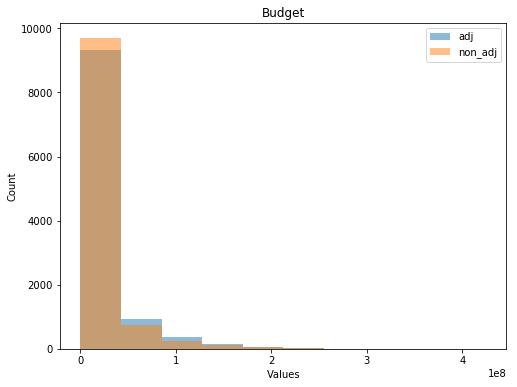

In [15]:
# Draw the 2 histograms of the budget and budget_adj together in the same figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_movies['budget_adj'], alpha=0.5, label='adj')
ax.hist(df_movies['budget'], alpha=0.5, label='non_adj')
ax.set_title('Budget')
ax.set_xlabel('Values')
ax.set_ylabel('Count')
ax.legend(loc = 'upper right')
plt.show()

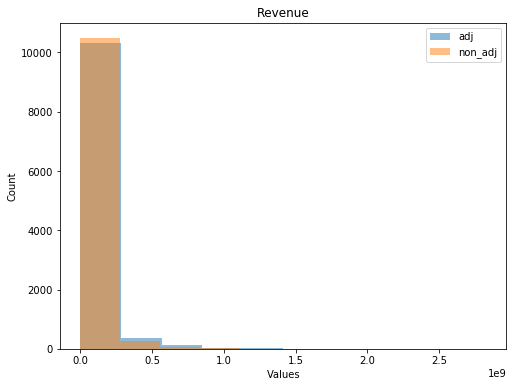

In [16]:
# Draw the 2 histograms of the revenue and revenue_adj together in the same figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_movies['revenue_adj'], alpha=0.5, label='adj')
ax.hist(df_movies['revenue'], alpha=0.5, label='non_adj')
ax.set_title('Revenue')
ax.set_xlabel('Values')
ax.set_ylabel('Count')
ax.legend(loc = 'upper right')
plt.show()

#### Conclusion

> **There is some features that takes more that one value in each cell like (genres, cast, director, and keywords.) Those values are separated with the '|' character. So, we need to take care of that if needed while we work.**

> **The budget_adj/revenue_adj features distributions are very similar to budget/revenue features, but they change a little for the values that less than 250 million dollor - as they give some of them a higher value - which is so relastic when comparing the movies together. As we can't really compare revenues of movies from the 80's with movies from the year 2015 because if we did, then we didn't take into consideration the inflation of the dollar currency over time.  
So I think comparing revenues/budgets with the adj-features makes more scence and I will use them during my analysis**

### Data Cleaning 
> **For the purpose of answering our questions, we will perform some basic operatures like dropping duplicates, we will remove some uneeded featrues that want be useful for us like budget/ revenue (as explained in the previous section,) homepage, release_data (I will use release_year instead,) tagline, keyworks, overview, and imdb_id.**

> **I will keep the main features to be used like ID, popularity, original_title, cast, director, genres, vote_count, vote_avg, and budget_adj/revenue_adj. I will also keep the runtime feature to see if we can benfit from it or not**

> **I will modify the genres feature to make its values to be lists instead of '|' seperated values (as it has just 20 unique value.) However, I won't do the same modification for the other features with the same issues and I'll deal with them as strings (becaues they all have more than 2000 unique values.)**

> **I won't remove NAN values now, I will leave them to be removed manually depending on the situation and the question.**

**Drop Duplicates**

In [17]:
df_movies.drop_duplicates(inplace=True)

**Dropping unnecessary features**

In [18]:
df_movies.drop(columns=['imdb_id', 'budget', 'revenue', 'homepage',
                        'tagline', 'keywords', 'overview', 'release_date'], inplace=True)

**Modiy genres feature**

In [19]:
# Split the genres feature string by the '|' character to form a list of strings
df_movies['genres'] = df_movies['genres'].str.split('|')
df_movies.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis

> **We applied the general cleaning steps that will help us answering our questions. We are ready to go**

### Q1. Which genres are most popular from year to year?

>**The first step to answer this question is to split the geners of every movie and make it a seperete feature. That will help us studing the genres with respect to each year.**

**If the genre exists, put 1, otherwise, keep it NAN and then fill NAN with 0s**

In [20]:
# Take a copy of df_movies and make every gener a seperete feature 
moviesWithGenres_df = df_movies.copy()

# Dropping NAN genres values
moviesWithGenres_df.dropna(axis=0, subset=['genres'], inplace=True)

# Iterate through the rows and the genre feature to create a new column for each genre
# If a new genre is appeared, create a new column and put 1 in that row of the column
# If its a genre appeared again, we simply put 1 in the its column that we created before
for index, row in moviesWithGenres_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1

# Fill the NAN values with zeros
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head(4)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Let's just take the important features from our data frame (release_year, popularity, and all the genres.)**

In [21]:
# Selecting the important featrues (release_year, popularity,
# and all genre columns that starts from the 13th column index)
genres_df = moviesWithGenres_df.loc[:, ['release_year', 'popularity']].copy()
genres_df = pd.concat([genres_df, moviesWithGenres_df.iloc[:, 13:].copy()], axis=1)
genres_df.head()

,release_year,popularity,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,2015,32.985763,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,28.419936,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,13.112507,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,11.173104,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,9.335014,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Calulating the average popularity of every gener by grouping by release_date with popularity and every gener we have separately, and add it to the generesPopularities_df data frame**

In [22]:
# Group by release_year and calculating the mean, reset index and call it as data frame not data series
genresPopularities_df = genres_df.copy().groupby('release_year').mean().reset_index()[['release_year']]

# Iterate through genres sepreatly as we take the related rows of this genre
# And groub its rows by release_year to calculate the average popularity
# OF every genre with respect to every release year
for genre in genres_df.columns[2:]:
    genresPopularities_df[genre + '_popularity'] = genres_df[genres_df[genre]==1][['release_year', 'popularity']].groupby('release_year').mean().reset_index()['popularity']
    
genresPopularities_df.head()    

,release_year,Action_popularity,Adventure_popularity,Science Fiction_popularity,Thriller_popularity,Fantasy_popularity,Crime_popularity,Western_popularity,Drama_popularity,Family_popularity,...,Comedy_popularity,Mystery_popularity,Romance_popularity,War_popularity,History_popularity,Music_popularity,Horror_popularity,Documentary_popularity,TV Movie_popularity,Foreign_popularity
0,1960,0.590724,0.700981,0.327905,0.811910,0.428247,0.346479,0.567759,0.566305,0.278064,...,0.396000,0.712793,0.541227,0.225863,0.412364,0.423531,0.591450,0.080598,0.600975,0.194948
1,1961,0.365913,0.767323,0.274103,0.760582,0.154073,0.806519,0.210021,0.432233,0.755722,...,0.679838,0.259220,0.426036,0.531184,0.334463,0.564748,0.254578,0.095101,0.528660,0.113651
2,1962,0.708945,0.942513,0.179212,0.719929,0.235542,0.472816,0.414180,0.392000,0.323463,...,0.273183,0.421033,0.365621,0.506162,0.600060,0.323933,0.179368,0.213653,0.318475,0.235542
3,1963,0.951729,0.728487,0.467835,0.622580,0.214071,0.552367,0.246957,0.322448,0.852632,...,0.444481,0.308091,0.399573,0.664326,0.481618,0.753799,0.376901,0.265169,0.176973,0.351647
4,1964,0.813087,0.736431,0.226636,0.343072,0.599791,0.261690,0.127679,0.364818,0.878298,...,0.491229,0.209204,0.221586,0.930959,0.316377,0.968850,0.189650,0.021941,0.143165,0.152209


**Now, we can see which genre is the most popular for every year of the study**

In [23]:
# Set release_year to be the index, transpose it to apply idxmax() And get the maximum popularity
genresPopularities_df.set_index('release_year').T.idxmax().str[:-11]

release_year
1960          Animation
1961          Animation
1962          Adventure
1963             Action
1964              Music
1965          Animation
1966           Thriller
1967            Mystery
1968    Science Fiction
1969              Crime
1970            Fantasy
1971             Family
1972              Crime
1973             Family
1974            Fantasy
1975          Adventure
1976              Crime
1977             Action
1978           Thriller
1979             Action
1980                War
1981           Thriller
1982    Science Fiction
1983          Adventure
1984             Family
1985          Animation
1986          Adventure
1987          Animation
1988          Animation
1989             Family
1990          Animation
1991          Animation
1992          Adventure
1993            Western
1994              Crime
1995    Science Fiction
1996                War
1997    Science Fiction
1998          Animation
1999            Fantasy
2000            Fantasy
200

>**Here is 2 plots to see the change of popularities of 2 different generes over time**  
**As the most popular genre in 1960 which is "animation" is actully became liss popular over time**  
**On the other hand, the most popular genre in 2015 which is "Adventure" became so popular yeah but in just the last 10 years of the study**  

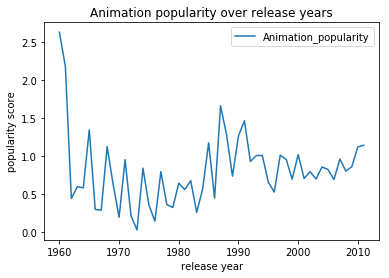

In [49]:
# Plot the development of genres 
target_genre = 'Animation'
genresPopularities_df.set_index('release_year')[[target_genre+'_popularity']].plot(kind='line')
# include title and axes labels
plt.title(target_genre+' popularity over release years');
plt.xlabel("release year");
plt.ylabel("popularity score");

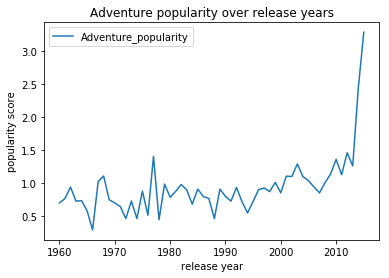

In [50]:
# Plot the development of genres 
target_genre = 'Adventure'
genresPopularities_df.set_index('release_year')[[target_genre+'_popularity']].plot(kind='line')
# include title and axes labels
plt.title(target_genre+' popularity over release years');
plt.xlabel("release year");
plt.ylabel("popularity score");

>**We can visualize the change of popularity of any genre in the dataset by changing the target_genre variable for a complete answer for the question, I will just be satisfied with ploting the "Animation" and "Adventure" genres.**

### Q2. Which combinations of genres are most popular from year to year? dose combinations matters?

>**This is an extension of the first question to see if a compinations of genres can affect the average popularity score for every year or not.**  
**We need to add a column for every combination of genres to the "generesPopularities_df" data frame and apply the same steps to answer the question (if a movie has this combination we put 1, if not we put 0.)**

**Iterate through combination of genres**

In [26]:
# Iterate through genres 2 times to introduce the combinations
for genre2 in genres_df.columns[2:]:
    for genre1 in genres_df.columns[2:]:
        mask = np.logical_and(genres_df[genre1]==1, genres_df[genre2]==1)
        genresPopularities_df[genre2+'_'+ genre1 + '_popularity'] = genres_df[mask][['release_year', 'popularity']].groupby('release_year').mean().reset_index()['popularity']
    
genresPopularities_df.head() 

,release_year,Action_popularity,Adventure_popularity,Science Fiction_popularity,Thriller_popularity,Fantasy_popularity,Crime_popularity,Western_popularity,Drama_popularity,Family_popularity,...,Foreign_Comedy_popularity,Foreign_Mystery_popularity,Foreign_Romance_popularity,Foreign_War_popularity,Foreign_History_popularity,Foreign_Music_popularity,Foreign_Horror_popularity,Foreign_Documentary_popularity,Foreign_TV Movie_popularity,Foreign_Foreign_popularity
0,1960,0.590724,0.700981,0.327905,0.811910,0.428247,0.346479,0.567759,0.566305,0.278064,...,0.235542,0.205712,0.235542,0.194948,0.194948,0.210188,0.152209,0.013131,NaN,0.194948
1,1961,0.365913,0.767323,0.274103,0.760582,0.154073,0.806519,0.210021,0.432233,0.755722,...,0.380321,0.127505,0.252265,0.207288,0.092150,NaN,0.004770,0.011723,NaN,0.113651
2,1962,0.708945,0.942513,0.179212,0.719929,0.235542,0.472816,0.414180,0.392000,0.323463,...,0.414316,0.121984,0.128025,0.138624,0.275662,NaN,0.148192,0.140910,NaN,0.235542
3,1963,0.951729,0.728487,0.467835,0.622580,0.214071,0.552367,0.246957,0.322448,0.852632,...,0.166624,0.443952,0.143070,0.267577,0.195606,NaN,0.140710,0.096396,NaN,0.351647
4,1964,0.813087,0.736431,0.226636,0.343072,0.599791,0.261690,0.127679,0.364818,0.878298,...,0.166725,0.215030,0.093760,NaN,0.201869,NaN,0.205712,0.097543,NaN,0.152209


**Now, we can see the popular compinations over the years and compare it to the last questions results to see if calculating the popularity of combinations actually changed anything or not**

In [27]:
# Concatenate the results of the previous quesion with the combinations results to compare them
pd.concat([genresPopularities_df.iloc[:,:21].set_index('release_year').T.idxmax().str[:-11],
           genresPopularities_df.set_index('release_year').T.idxmax().str[:-11]], axis=1).rename(
    columns={0:'Most_popular_single_genres',1:'Most_popular_combinations_of_genres'})

,Most_popular_single_genres,Most_popular_combinations_of_genres
release_year,,
1960,Animation,Animation_Romance
1961,Animation,Adventure_Thriller
1962,Adventure,Fantasy_War
1963,Action,Western_Mystery
1964,Music,Action_Adventure
1965,Animation,Action_Horror
1966,Thriller,Fantasy_Crime
1967,Mystery,Animation_Horror
1968,Science Fiction,Action_Science Fiction


>**Now, we see that combnations matters as the results generally changed in most of years.**  
**As in most of the years, the most popular combination didn't contain the most popular gener (for example 2008, 2009, 2010, 2012, 2013, ... etc.)**  
**And for some other years the most popular combination contained the most popular gener (for example 2014, 2015, ...etc.)**

### Q3. What kinds of proerties are associated with movies that have high revenues?

>**This question can be answered by checking the correlation between the revenue_adj feature and the other featrues, is they are correlated then they are generally associated with the movies with high revenues.**

**Remove zeros and NAN values so they don't have effects on the correlation results**

In [28]:
revenue_df = moviesWithGenres_df.copy()
revenue_df[revenue_df['revenue_adj']==0.0] = np.nan
revenue_df.dropna(axis=0, subset=['revenue_adj'], inplace=True)

**Sort the correlation values in a descending order.**

In [29]:
feature_corr = revenue_df.corr().unstack().sort_values(ascending=False)
feature_corr

id            id              1.000000
Western       Western         1.000000
vote_count    vote_count      1.000000
vote_average  vote_average    1.000000
release_year  release_year    1.000000
                                ...   
Romance       Thriller       -0.215761
Comedy        runtime        -0.243117
runtime       Comedy         -0.243117
Thriller      Comedy         -0.367520
Comedy        Thriller       -0.367520
Length: 784, dtype: float64

**Visualize the highest correlations with the revenue_adj feature only, we display positive correlations bigger than 0.5**

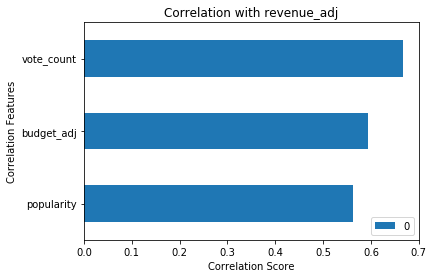

In [55]:
# Get the corr. scores between 0.5 and 1, reset index to adress the 2 levels
corr_df = feature_corr[(abs(feature_corr)>0.5) & (abs(feature_corr)<1)].reset_index()

# Pick just the revenue_adj which is our targeted feature to study
corr_df = corr_df[corr_df['level_0'] == 'revenue_adj']

# Drop level 0 we already got all the revenue_adj relations
# Set level 1 as index and draw the barh chart
corr_df.drop(columns='level_0').set_index('level_1')[::-1].plot(kind='barh')

# include title and axes labels
plt.title('Correlation with revenue_adj');
plt.xlabel("Correlation Score");
plt.ylabel("Correlation Features");

>**So yeah a high revenue moive will generally have:  
1- High vote_count (as a lot of people saw it and voted for it.)  
2- High budget.  
3- High popularity.**

### Q4. Who are the top 10 production companies in terms of number of movies preduced and the total earnings (revenu_adj - budget_adj) from thair movies?

>**This question and the next 2 questions to it, all has a simillar approach so they can be answered.**

>**1- We choose the related featrues to the question (in this case: production_companies, budget_adj/revenue_adj, and popularity.)  
2- We drop NAN values with respect to our main featrue 'production_companies'.  
3- We collect the unique values of the production_companies in uniqueCompanies list and then we construct the uniqueCompanies_df dataframe.  
4- The last step is to calculate the total earnings, and the average popularities of the movies for each and every company sepratly to see which ones are included in the Top 10 list.**

In [31]:
# Choose  therelated featrues to the question which are: 
#  production_companies, budget_adj/revenue_adj, and popularity
company_df = df_movies.loc[:, ['popularity', 'budget_adj', 
                               'revenue_adj','production_companies']].copy()

# Drop NAN values with respect to our main featrue 'production_companies'
company_df.dropna(axis=0, subset=['production_companies'], inplace=True)

# Split the values of the companies from strings to lists
company_df['production_companies'] = company_df['production_companies'].str.split('|')

# Collect the unique values of the production_companies in uniqueCompanies list
uniqueCompanies = []
for j in company_df['production_companies'].values:
    for i in j:
        uniqueCompanies.append(i)
uniqueCompanies = list(set(uniqueCompanies))  # To keep only the unique values in the list

# Construct the uniqueCompanies_df dataframe.
uniqueCompanies_df = pd.DataFrame(uniqueCompanies).rename(columns={0: 'company_name'})
uniqueCompanies_df['total_earnings'] = 0
uniqueCompanies_df['average_popularity'] = 0

In [32]:
# Remaking the first 2 steps to Undo the splitting step of splitting strings into lists
# I did that cause Iterating through strings was easier and faster.
company_df = df_movies.loc[:, ['popularity', 'budget_adj', 'revenue_adj','production_companies']].copy()
company_df.dropna(axis=0, subset=['production_companies'], inplace=True) #Dropping NAN companies values
uniqueCompanies_df.set_index('company_name', inplace=True)

# Iterate through uniqueCompanies and calculate average popularites and total earning for each of them
# Total Earnings are calculated as the difference between revenue_adj, and budget_adj
for company in uniqueCompanies:
    matching = [i for i, s in enumerate(company_df['production_companies'].str[:]) if company in s]
    uniqueCompanies_df.loc[company, 'average_popularity'] = company_df.iloc[matching, :]['popularity'].mean()
    uniqueCompanies_df.loc[company, 'total_earnings'] = company_df.iloc[matching, :]['revenue_adj'].sum() - company_df.iloc[matching, :]['budget_adj'].sum()

>**SO, the Top 10 Companies in terms of total earnings.**  
**The top company is Entertainment with total earnings of over than 95 Billion Dollar,
the second is Fox with total earnings of over 52 Billion Dollar ...etc.**

In [33]:
# Sort by average_popularity, keep the best 10 (Drop the average_popularity column)
uniqueCompanies_df.sort_values(by='total_earnings',ascending=False)[:10].reset_index().drop(columns='average_popularity')

,company_name,total_earnings
0,Entertainment,9.536683e+10
1,Fox,5.206966e+10
2,Universal,4.760498e+10
3,Warner Bros.,4.725858e+10
4,Universal Pictures,4.542582e+10
5,Twentieth Century Fox,4.263187e+10
6,Paramount,4.094018e+10
7,Paramount Pictures,4.032439e+10
8,Twentieth Century Fox Film Corporation,3.914289e+10
9,Columbia Pictures,3.185521e+10


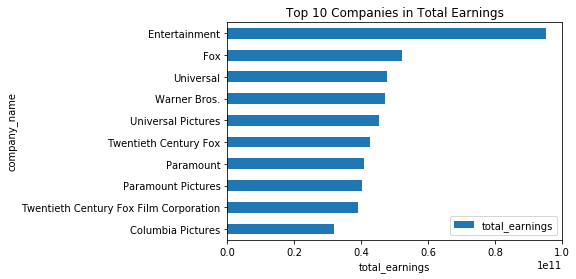

In [64]:
# Sort by average_popularity, keep the best 10, and plot the barh chart
top10_companies = uniqueCompanies_df.sort_values(by='total_earnings',ascending=False).drop(columns='average_popularity')[:10]
top10_companies[::-1].plot(kind='barh', title='Top 10 Companies in Total Earnings');plt.xlabel("total_earnings");

>**The Top 10 Companies in terms of popularity of their produced movies.**  
**The top company is Bulletproof Cupid, the second is Fuji Television Network ...etc.**

In [35]:
# Sort by average_popularity, keep the best 10 (Drop the total_earnings column)
uniqueCompanies_df.sort_values(by='average_popularity',ascending=False)[:10].reset_index().drop(columns='total_earnings')

,company_name,average_popularity
0,Bulletproof Cupid,14.311205
1,Fuji Television Network,12.777401
2,DefyNite Films,11.422751
3,Truenorth Productions,11.173104
4,3Foot7,10.174599
5,Linson Films,8.947905
6,Atman Entertainment,8.947905
7,Bristol Automotive,8.110711
8,Dayday Films,7.137273
9,Syncopy,7.050715


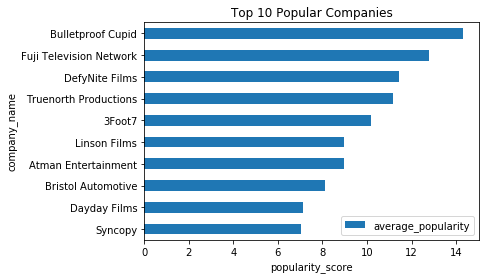

In [63]:
# Sort by average_popularity, keep the best 10, and plot the barh chart
top10_companies = uniqueCompanies_df.sort_values(by='average_popularity',ascending=False).drop(columns='total_earnings')[:10]
top10_companies[::-1].plot(kind='barh', title='Top 10 Popular Companies');plt.xlabel("popularity_score");

### Q5. Who are the top 10 actors with the top popluoarity movies in this dataset?

>**Exactly the same steps of the previous question.**

>**1- We choose the related featrues to the question (in this case: cast, and popularity.)  
2- We drop NAN values with respect to our main featrue 'cast'.  
3- We collect the unique values of the 'cast' in uniqueActors list and then we construct the uniqueActors_df dataframe.  
4- The last step is to calculate the average popularities of the movies for each and every actor sepratly to see which ones are included in the Top 10 list.**

In [37]:
# Choose the related featrues to the question which are: cast, and popularity.
actor_df = df_movies.loc[:, ['popularity', 'cast']].copy()

# Drop NAN values with respect to our main featrue 'cast'
actor_df.dropna(axis=0, subset=['cast'], inplace=True)

# Split the values of the cast from strings to lists
actor_df['cast'] = actor_df['cast'].str.split('|')

# Collect the unique values of the cast in uniqueActors list
# I extract all the values from lists first than keep the unique ones
uniqueActors = []
for j in actor_df['cast'].values:
    for i in j:
        uniqueActors.append(i)
uniqueActors = list(set(uniqueActors)) # To keep only the unique values in the list

# Construct the uniqueActors_df dataframe.
uniqueActors_df = pd.DataFrame(uniqueActors).rename(columns={0: 'actor_name'})
uniqueActors_df['average_popularity'] = 0

In [38]:
# Remaking the first 2 steps to Undo the splitting step of splitting strings into lists
actor_df = df_movies.loc[:, ['popularity', 'cast']].copy()
actor_df.dropna(axis=0, subset=['cast'], inplace=True) #Dropping NAN actors values
uniqueActors_df.set_index('actor_name', inplace=True)

# Iterate through unique actors and calculate average popularites
for actor in uniqueActors:
    matching = [i for i, s in enumerate(actor_df['cast'].str[:]) if actor in s]
    uniqueActors_df.loc[actor, 'average_popularity'] = actor_df.iloc[matching, :]['popularity'].mean()

>**Top 10 Actors in terms of popularity of their movies.**  
**The top Actor is Josh Helman, the second is Daisy Ridley ...etc.**

In [39]:
# Sort by average_popularity, keep the best 10
uniqueActors_df.sort_values(by='average_popularity',ascending=False)[:10].reset_index()

,actor_name,average_popularity
0,Josh Helman,28.419936
1,Daisy Ridley,11.173104
2,Hugh Keays-Byrne,10.211471
3,Daniel Henney,8.691294
4,Ryan Potter,8.691294
5,Brian Dobson,8.411577
6,Gloria Foster,7.753899
7,Ansel Elgort,7.703183
8,Ki Hong Lee,7.137273
9,Blake Cooper,7.137273


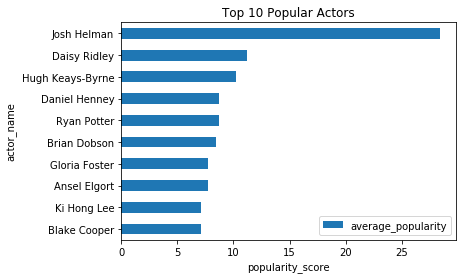

In [60]:
# Sort by average_popularity, keep the best 10, and plot the barh chart
top10_actors = uniqueActors_df.sort_values(by='average_popularity',ascending=False)[:10]
top10_actors[::-1].plot(kind='barh', title='Top 10 Popular Actors');plt.xlabel("popularity_score");

### Q6. Who are the top 10 directors with the top popuolarity movies in this dataset?

>**Exactly the same steps of the previous 2 question.**

>**1- We choose the related featrues to the question (in this case: director, and popularity.)  
2- We drop NAN values with respect to our main featrue 'director'.  
3- We collect the unique values of the 'director' in uniqueDirectors list and then we construct the uniqueDirectors_df dataframe.  
4- The last step is to calculate the average popularities of the movies for each and every director sepratly to see which ones are included in the Top 10 list.**

In [41]:
# Choose the related featrues to the question which are: director, and popularity.
director_df = df_movies.loc[:, ['popularity', 'director']].copy()

# Drop NAN values with respect to our main featrue 'director'
director_df.dropna(axis=0, subset=['director'], inplace=True) #Dropping NAN companies values

# Split the values of the director from strings to lists
director_df['director'] = director_df['director'].str.split('|')

# Collect the unique values of the director in uniqueDirectors list
# I extract all the values from lists first than keep the unique ones
uniqueDirectors = []
for j in director_df['director'].values:
    for i in j:
        uniqueDirectors.append(i)
uniqueDirectors = list(set(uniqueDirectors)) # To keep only the unique values in the list

# Construct the uniqueDirectors_df dataframe.
uniqueDirectors_df = pd.DataFrame(uniqueDirectors).rename(columns={0: 'director_name'})
uniqueDirectors_df['average_popularity'] = 0

In [42]:
# Remaking the first 2 steps to Undo the splitting step of splitting strings into lists
director_df = df_movies.loc[:, ['popularity', 'director']].copy()
director_df.dropna(axis=0, subset=['director'], inplace=True) #Dropping NAN directors values
uniqueDirectors_df.set_index('director_name', inplace=True)

# Iterate through unique directors and calculate average popularites
for director in uniqueDirectors:
    matching = [i for i, s in enumerate(director_df['director'].str[:]) if director in s]
    uniqueDirectors_df.loc[director, 'average_popularity'] = director_df.iloc[matching, :]['popularity'].mean()

>**Top 10 Directors in terms of popularity of their movies.**  
**The top Director is Josh Helman, the second is Daisy Ridley ...etc.**

In [43]:
# Sort by average_popularity, keep the best 10
uniqueDirectors_df.sort_values(by='average_popularity',ascending=False)[:10].reset_index()

,director_name,average_popularity
0,Colin Trevorrow,16.696886
1,David Leitch,11.422751
2,Chad Stahelski,11.422751
3,Juno John Lee,8.411577
4,Alan Taylor,6.883129
5,Peter Richardson,6.668990
6,Christopher Nolan,6.195521
7,Alex Garland,6.118847
8,Patrick Tatopoulos,5.806897
9,Wes Ball,5.553082


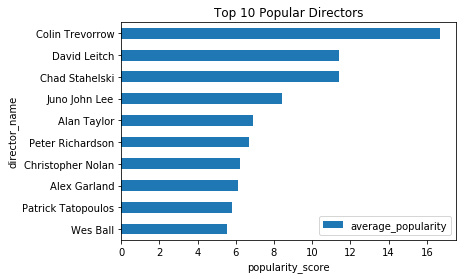

In [62]:
# Sort by average_popularity, keep the best 10, and plot the barh chart
top10_directors = uniqueDirectors_df.sort_values(by='average_popularity',ascending=False)[:10]
top10_directors[::-1].plot(kind='barh', title='Top 10 Popular Directors');plt.xlabel("popularity_score");

## The next 2 questions are simple but intuative, as anyone could ask these questions with a dataset like this

### Q7. Top 10 movies in terms of earnings

>**The answer to this question is simplly to calculate earnings (revenue-budget,) then sort the values by them and visualize it. However, for this partucallur question, I will use the original budget/revenue features not the adj-features. I believe this an abstract question that should be answered with the real numbers not with estimated numbers.**

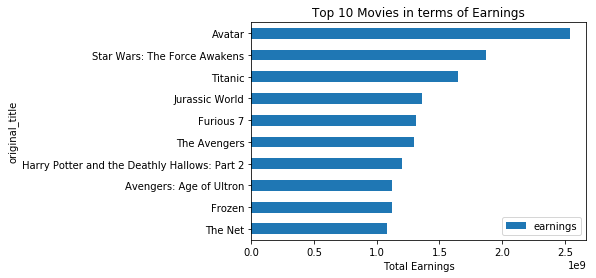

In [66]:
# Take a copy of the original df_movies data frame
top10_movies_df = original_df_movies.copy()

# Extract the revenue/ budget features to calculate the earnings of each movie
top10_movies_df['earnings'] = np.array(top10_movies_df['revenue']) - np.array(top10_movies_df['budget'])

# Extract important featrues (Title, earnings,) and sort values by earnings and take the best 10
top10_movies = top10_movies_df[['original_title', 'earnings']].sort_values(
    by='earnings',ascending=False).set_index('original_title')[:10]

# Plot the barh chart
top10_movies[::-1].plot(kind='barh', title='Top 10 Movies in terms of Earnings');plt.xlabel("Total Earnings");

>**This is the answer if we used the adj-features**

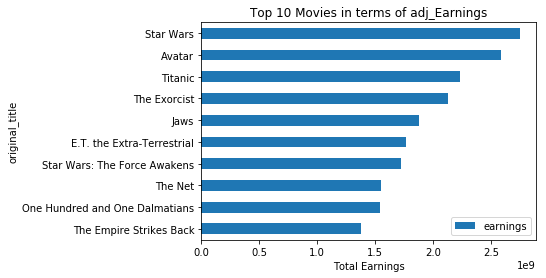

In [67]:
# Take a copy of the df_movies data frame
top10_movies_df = df_movies.copy()

# Extract the revenue_adj/ budget_adj features to calculate the earnings of each movie
top10_movies_df['earnings'] = np.array(top10_movies_df['revenue_adj']) - np.array(top10_movies_df['budget_adj'])

# Extract important featrues (Title, earnings,) and sort values by earnings and take the best 10
top10_movies = top10_movies_df[['original_title', 'earnings']].sort_values(
    by='earnings',ascending=False).set_index('original_title')[:10]

# Plot the barh chart
top10_movies[::-1].plot(kind='barh', title='Top 10 Movies in terms of adj_Earnings');plt.xlabel("Total Earnings");

### Q8. Which release year with the best movies in terms of popularites?

>**The answer to this question is to groupby the release_year then sort the values by popularity and visualize it**

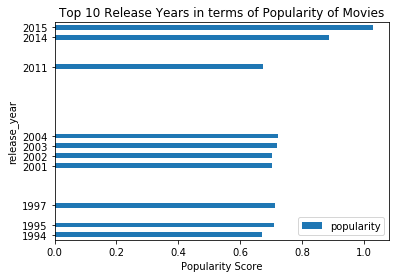

In [71]:
# Take a copy of the df_movies data frame
top10_years_df = df_movies.copy()

# Group movies by release year, and calculate the average popularity for every year
# Then sort values by there average popularity score and take the best 10
top10_years_df = top10_movies_df.groupby('release_year')[['popularity']].mean().sort_values(
    by='popularity',ascending=False)[:10]

# Plot the barh chart
top10_years_df[::-1].plot(kind='barh', title='Top 10 Release Years in terms of Popularity of Movies');
plt.xlabel("Popularity Score");

<a id='conclusions'></a>
## Conclusions

> **The dataset was so intresting and has a lot of information. and here's some notes from the findings of every question we answered:** 

>**Q1: Some genres were so popular in the past and its popularity decreased, and vise versa.  
Q2: Studying compinations of genres give us a deeper look into the popularity of the movies.  
Q3: High vote_count, budget, and popularity are generally associated with high revenue.  
Q4: We knew which are the Top 10 production companies in the industry.  
Q5: We knew which are the Top 10 popular actors in this data set.  
Q6: We knew which are the Top 10 popular directors in this data set.  
Q7: Avatar Movie has the higher earnings untill the year 2015.  
Q8: The years 2015, 2014 had the best and the most popular movies in this data set.**


### Limitations

> **We finally need to address some of the limitations we faced in our analysis, as those impliy some uncertainty of the results.  
1- First, we are just work with a sample of the TMBD dataset form Kaggle, so maybe a different sample may lead to different results.  
2- I found many issues and missing values during my explortation such as: (movies with zero budget, and revenues; movies without cast, directors, production companies.)  
3- The lack of discription as I really didn't understand how the popularity score was calculated in the first place, and whether should I gone with my exploration depending on the vote average.  
4- some other uneeded features that I don't know why they even exists like homepage, and what is the difference between some other featrues like tagline and keywords, so I just dropped them.  
5- There was no statistical inference performed in my analysis (to test the significance of the results that you found.) So yeah that also applies some uncertainty of the results.**

> **I hope you enjoyed these findings, and Thank you.**

<a id='conclusions'></a>
## Resources
> Stackoverflow